### Empirical method for estimation of endmembers

**Authors :** *Idriss ABDOULWAHAB & Amrin AKTER*

This notebook is dedicated on the estimation of endmembers using the empirical method from : 
B. Luo et al. 2013

The dataset we will use is from the paper :
B. Koirala et al., "A Multisensor Hyperspectral Benchmark Dataset For Unmixing of Intimate Mixtures," in IEEE Sensors Journal, doi: 10.1109/JSEN.2023.3343552

#### 1.1 Data loading

In [1]:
import glob
import os
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = loadmat('dataset/ASD_Spectroradiometer/ASD_Spectroradiometer_dataset.mat')
data_matrix = data['ASD_Spectroradiometer']

N_s = len(data_matrix[:,1][0]) # Numbers of bands
N_a = data_matrix.shape[1] # Numbers of samples

N_s = N_s//4

X = np.ones((N_s,N_a))

for i in range (N_a):
    for j in range (N_s):
        X[j,i]=data_matrix[:,i][0][j][0]

has_infinite = np.iscomplexobj(X)

if has_infinite:
    print("La matrice X contient des valeurs infinies !")

## It's important to center the data in order to compute covariance and correlation
mean = np.mean(X, axis=0)
std = np.std(X, axis=0, ddof=1)
X_centered = X-mean
X_normalized = X_centered/std

#### 1.2 Covariance and correlation

/home/idrissabd6/miniconda3/envs/perso_env/lib/python3.10/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/idrissabd6/miniconda3/envs/perso_env/lib/python3.10/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0.5, 1.0, 'Eigen values $\\hat{\\lambda_i}$ of K')

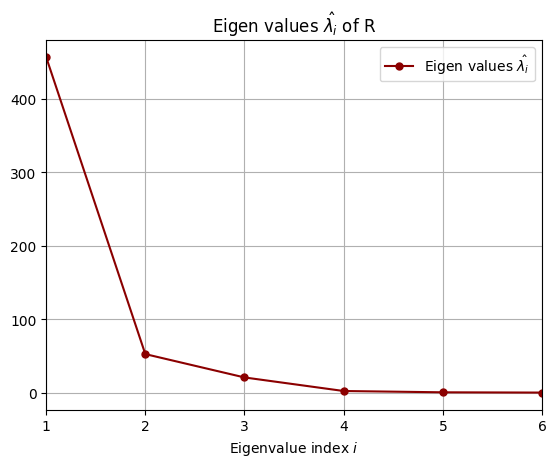

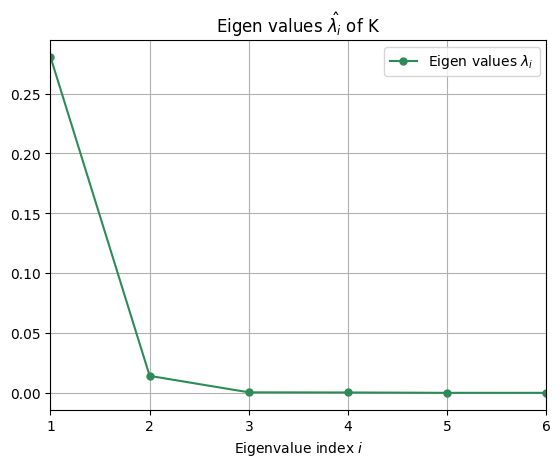

In [3]:
K = np.cov(X_centered, rowvar=True)
R = np.corrcoef(X_normalized, rowvar=True)

eig_vals_K, eig_vecs_K = np.linalg.eig(K) 
eig_vals_R, eig_vecs_R = np.linalg.eig(R) 

## Plot of eigen values
x_axis = np.linspace(1,N_s,N_s)
plt.figure(1)
plt.plot(x_axis,eig_vals_R,label='Eigen values $\hat{\lambda_i}$', marker='o', markersize=5, linestyle='-',color='darkred')
plt.grid()
plt.xlabel('Eigenvalue index $i$')
plt.legend()
plt.xlim([1,6])
plt.title("Eigen values $\hat{\lambda_i}$ of R")

plt.figure(2)
plt.plot(x_axis,eig_vals_K,label='Eigen values $\lambda_i$', marker='o', markersize=5, linestyle='-',color='seagreen')
plt.grid()
plt.legend()
plt.xlabel('Eigenvalue index $i$')
plt.xlim([1,6])
plt.title("Eigen values $\hat{\lambda_i}$ of K")

### 1.3 Likelihood function

/tmp/ipykernel_5683/2274083170.py:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
/tmp/ipykernel_5683/2274083170.py:31: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


Text(0.5, 1.0, 'Likelihood function $log(H)$')

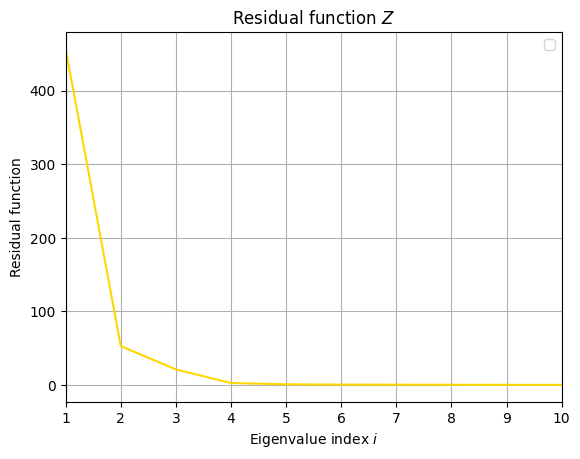

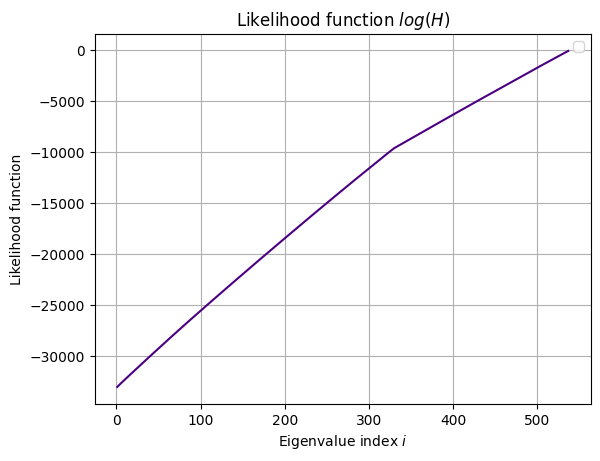

In [4]:
eig_R = eig_vals_R.real
eig_K = eig_vals_K.real

Z = eig_R-eig_K

H = np.zeros(N_s)
sigma = np.zeros(N_s)

for i in range (N_s):
    sigma[i] = (2/N_a)*(eig_R[i]**2 + eig_K[i]**2)

# Log-likelihood
for i in range (N_s):
    sum1 = np.sum((Z[i:]**2)/(2*sigma[i:]))
    sum2 = np.sum(np.log(np.sqrt(sigma[i:])))
    H[i] = -sum1-sum2

plt.figure()
plt.plot(x_axis,Z,color='gold')
plt.grid()
plt.xlim([1,10])
plt.legend()
plt.xlabel('Eigenvalue index $i$')
plt.ylabel('Residual function')
plt.title("Residual function $Z$")

plt.figure()
plt.plot(x_axis,H,color='indigo')
plt.grid()
#plt.xlim([1,10])
plt.legend()
plt.xlabel('Eigenvalue index $i$')
plt.ylabel('Likelihood function')
plt.title("Likelihood function $log(H)$")


### 1.4 Endmembers $\hat{N_c}$ estimation

In [5]:
N_c = np.argmax(H)-1
print("The number of endmembers is : ",N_c)

The number of endmembers is :  535
